In [4]:
%run algorithm.ipynb

import matplotlib.pyplot as plt
from datetime import timedelta
import time
import itertools
import networkx as nx

In [11]:
def test_graph(num_of_nodes,
               edge_existence_prob = 0.3,
               num_iters=30,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=15,
               tournament_size=3):

    G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
    while not nx.is_connected(G):
        G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)

    print(f"\n\nTesting a graph of {num_of_nodes} nodes and {len(G.edges)} edges...\n")
    mst=nx.minimum_spanning_tree(G)
    mst_leaves = sum(1 for node in mst if mst.degree[node] == 1)
    
    start_time = time.time()
    best_solution = ga(G, num_iters, elitism_size, mutation_prob, population_size, tournament_size)
    end_time = time.time()

    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    milliseconds = int((elapsed_time * 1000) % 1000)
    
    print(f"Execution time: \t\t\t {minutes}m {seconds}s {milliseconds}ms")
    print(f'Number of leaves of a random MST: \t {mst_leaves}')
    print(f'Number of leaves of MLST: \t\t {best_solution.fitness}')
    
    
    mlst = nx.Graph()
    mlst.add_edges_from(best_solution.edges)
    
    node_colors = []
    for node in mlst.nodes():
        if mlst.degree[node] == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')
    
    _, axes = plt.subplots(1, 2, figsize=(10, 5))

    nx.draw(G, node_size=10000/num_of_nodes, ax=axes[0])
    axes[0].set_title("Original graph")

    nx.draw(mlst, node_color=node_colors, node_size=10000/num_of_nodes, ax=axes[1])
    axes[1].set_title("Maximum Leaf Spanning Tree")

    plt.tight_layout()
    plt.show()




Testing a graph of 10 nodes and 13 edges...

Execution time: 			 0m 0s 65ms
Number of leaves of a random MST: 	 5
Number of leaves of MLST: 		 6


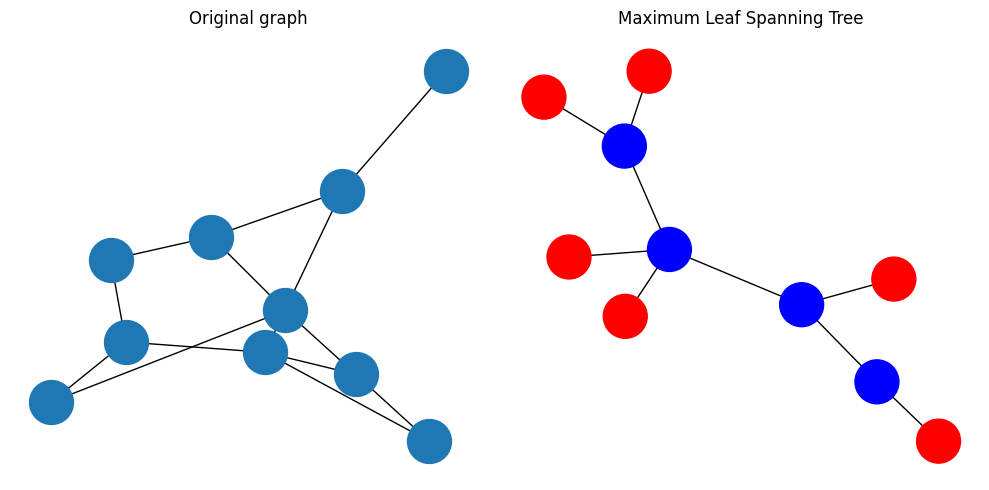

In [17]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.2,
               num_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=5)



Testing a graph of 10 nodes and 25 edges...

Execution time: 			 0m 0s 81ms
Number of leaves of a random MST: 	 6
Number of leaves of MLST: 		 7


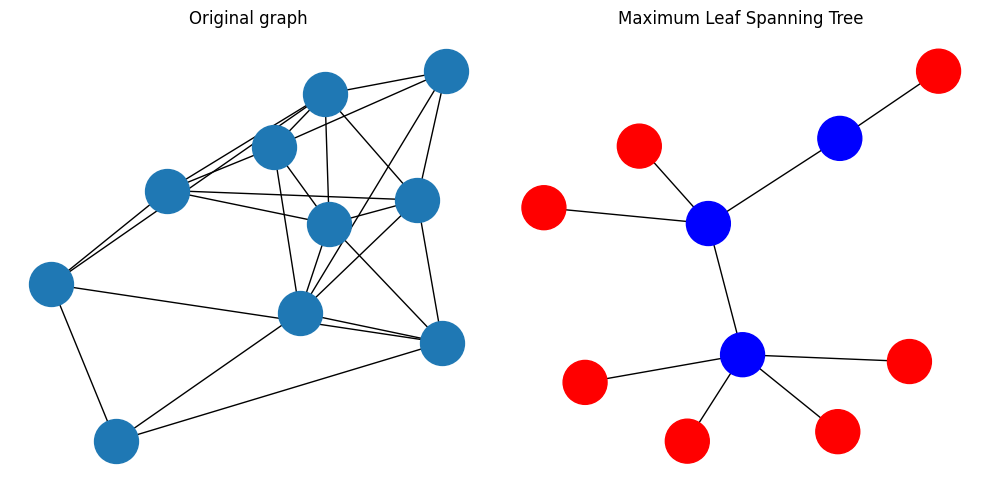

In [20]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.5,
               num_iters=10,
               elitism_size=5,
               mutation_prob=0.5,
               population_size=20,
               tournament_size=5)



Testing a graph of 10 nodes and 31 edges...

Execution time: 			 0m 0s 51ms
Number of leaves of a random MST: 	 7
Number of leaves of MLST: 		 8


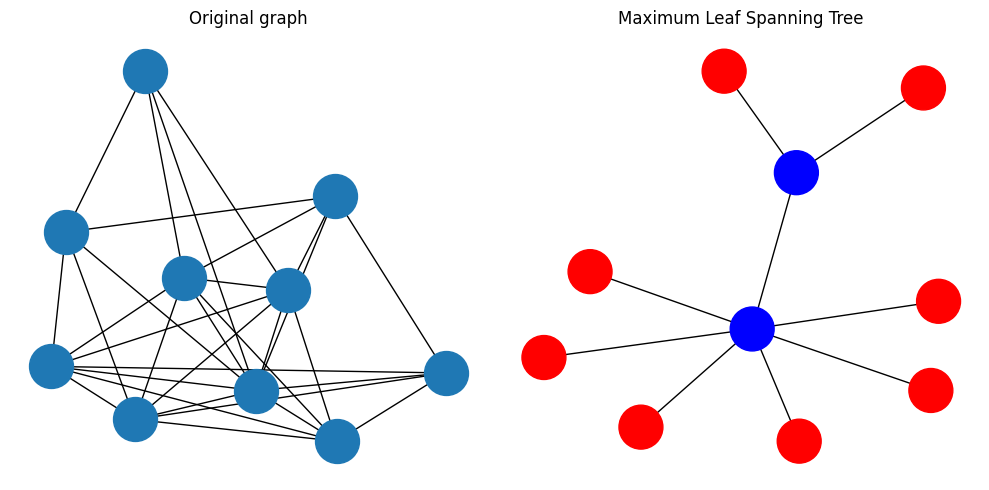

In [22]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.7,
               num_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=5)



Testing a graph of 20 nodes and 33 edges...

Execution time: 			 0m 0s 112ms
Number of leaves of a random MST: 	 8
Number of leaves of MLST: 		 12


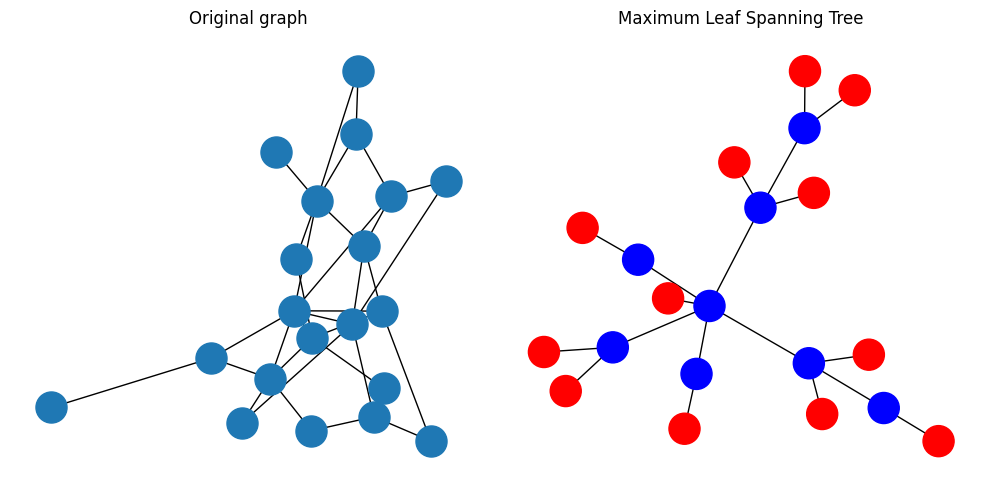

In [23]:
test_graph(num_of_nodes=20,
               edge_existence_prob = 0.2,
               num_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=10)



Testing a graph of 20 nodes and 97 edges...

Execution time: 			 0m 0s 118ms
Number of leaves of a random MST: 	 15
Number of leaves of MLST: 		 16


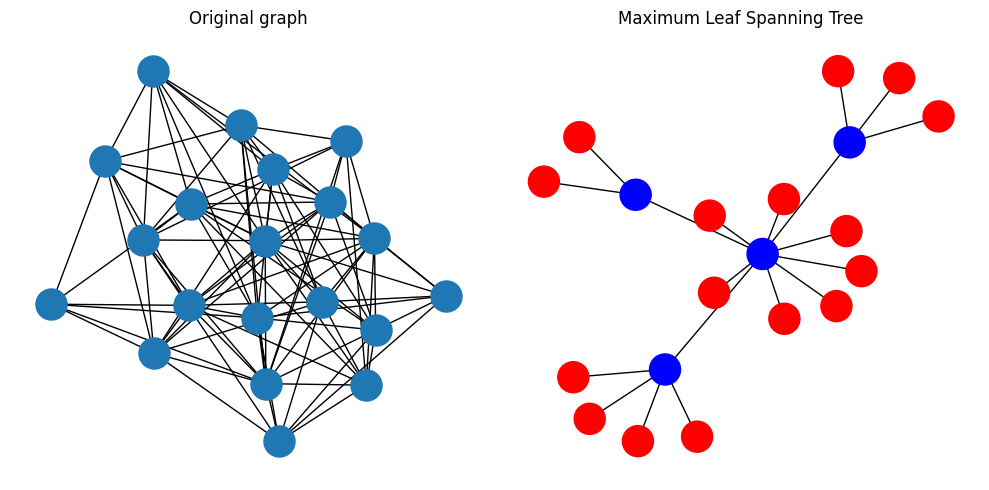

In [24]:
test_graph(num_of_nodes=20,
               edge_existence_prob = 0.5,
               num_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=10)



Testing a graph of 20 nodes and 142 edges...

Execution time: 			 0m 0s 106ms
Number of leaves of a random MST: 	 16
Number of leaves of MLST: 		 18


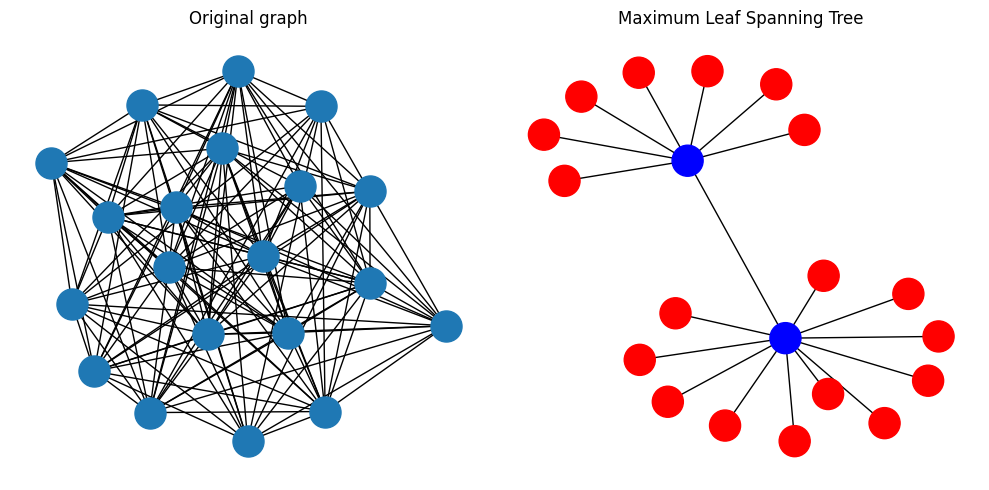

In [31]:
test_graph(num_of_nodes=20,
               edge_existence_prob = 0.7,
               num_iters=10,
               elitism_size=5,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=10)



Testing a graph of 50 nodes and 221 edges...

Execution time: 			 0m 0s 467ms
Number of leaves of a random MST: 	 35
Number of leaves of MLST: 		 37


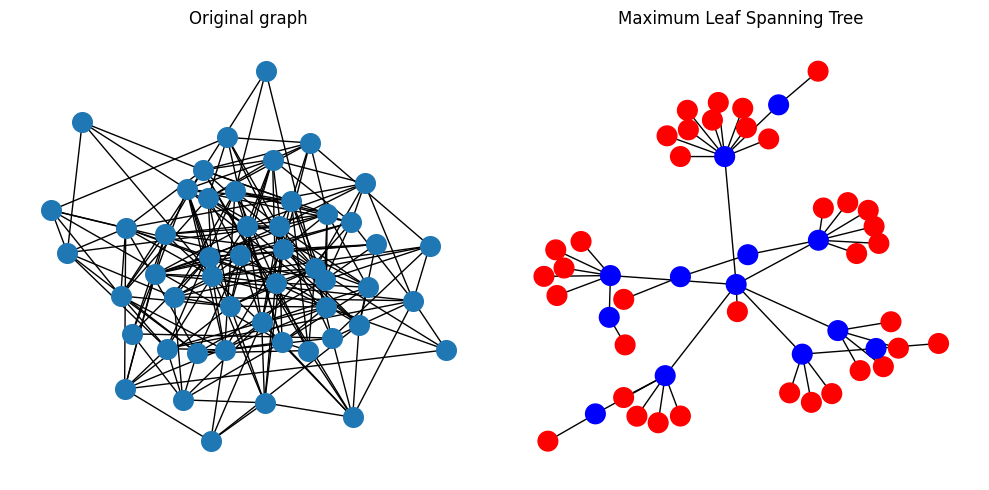

In [33]:
test_graph(num_of_nodes=50,
               edge_existence_prob = 0.2,
               num_iters=10,
               elitism_size=5,
               mutation_prob=0.5,
               population_size=30,
               tournament_size=5)



Testing a graph of 50 nodes and 608 edges...

Execution time: 			 0m 0s 683ms
Number of leaves of a random MST: 	 43
Number of leaves of MLST: 		 44


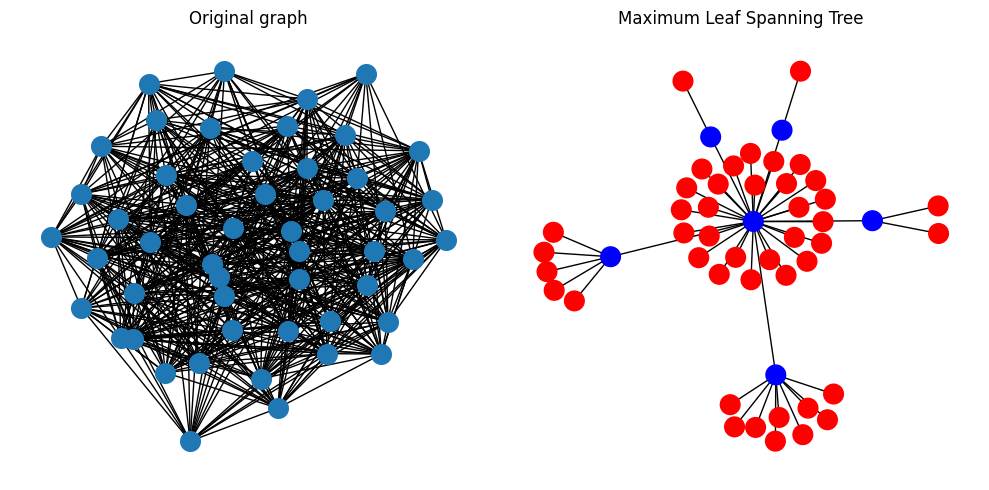

In [34]:
test_graph(num_of_nodes=50,
               edge_existence_prob = 0.5,
               num_iters=10,
               elitism_size=2,
               mutation_prob=0.7,
               population_size=20,
               tournament_size=10)



Testing a graph of 50 nodes and 834 edges...

Execution time: 			 0m 0s 578ms
Number of leaves of a random MST: 	 45
Number of leaves of MLST: 		 47


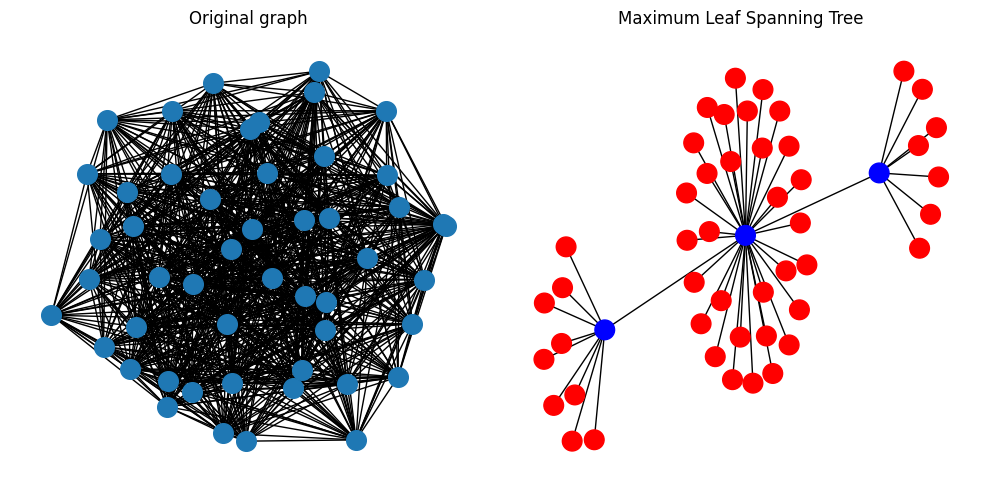

In [37]:
test_graph(num_of_nodes=50,
               edge_existence_prob = 0.7,
               num_iters=10,
               elitism_size=2,
               mutation_prob=0.5,
               population_size=20,
               tournament_size=5)



Testing a graph of 100 nodes and 1035 edges...

Execution time: 			 0m 3s 248ms
Number of leaves of a random MST: 	 85
Number of leaves of MLST: 		 88


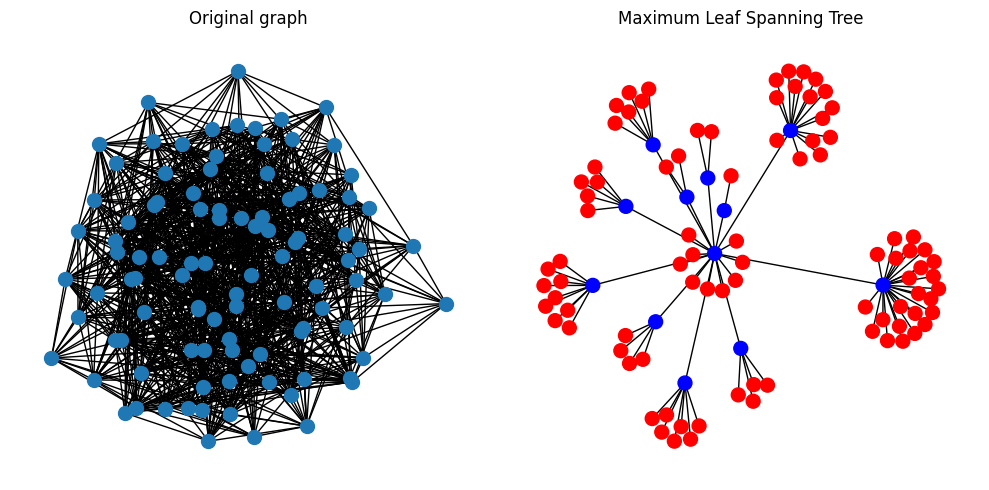

In [38]:
test_graph(num_of_nodes=100,
               edge_existence_prob = 0.2,
               num_iters=10,
               elitism_size=10,
               mutation_prob=0.5,
               population_size=75,
               tournament_size=20)



Testing a graph of 100 nodes and 2474 edges...

Execution time: 			 0m 2s 496ms
Number of leaves of a random MST: 	 94
Number of leaves of MLST: 		 95


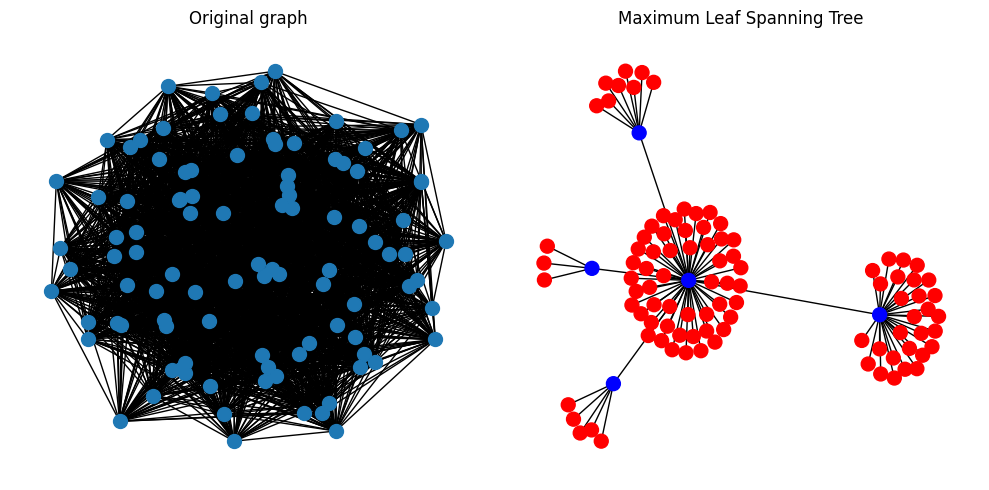

In [41]:
test_graph(num_of_nodes=100,
               edge_existence_prob = 0.5,
               num_iters=15,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=50,
               tournament_size=10)



Testing a graph of 100 nodes and 3476 edges...

Execution time: 			 0m 3s 143ms
Number of leaves of a random MST: 	 95
Number of leaves of MLST: 		 96


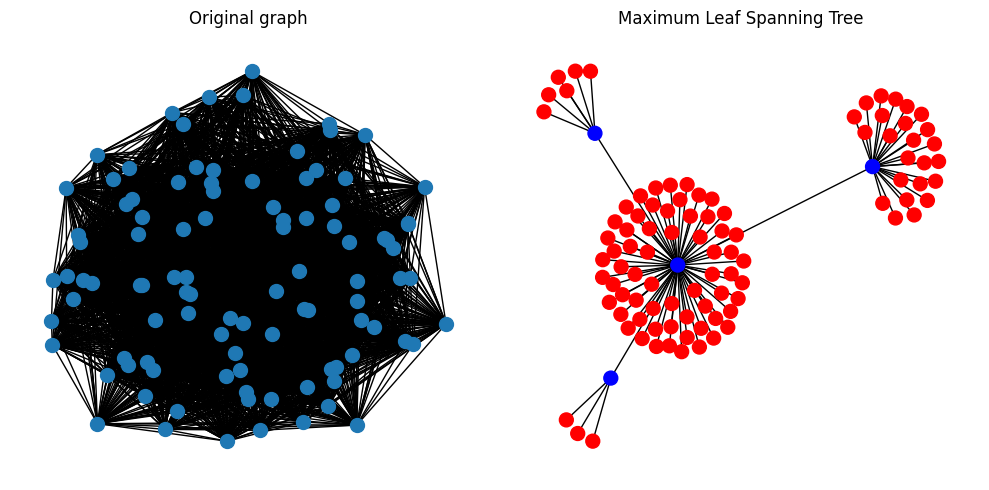

In [42]:
test_graph(num_of_nodes=100,
               edge_existence_prob = 0.7,
               num_iters=15,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=50,
               tournament_size=10)



Testing a graph of 500 nodes and 24873 edges...

Execution time: 			 0m 41s 196ms
Number of leaves of a random MST: 	 472
Number of leaves of MLST: 		 480


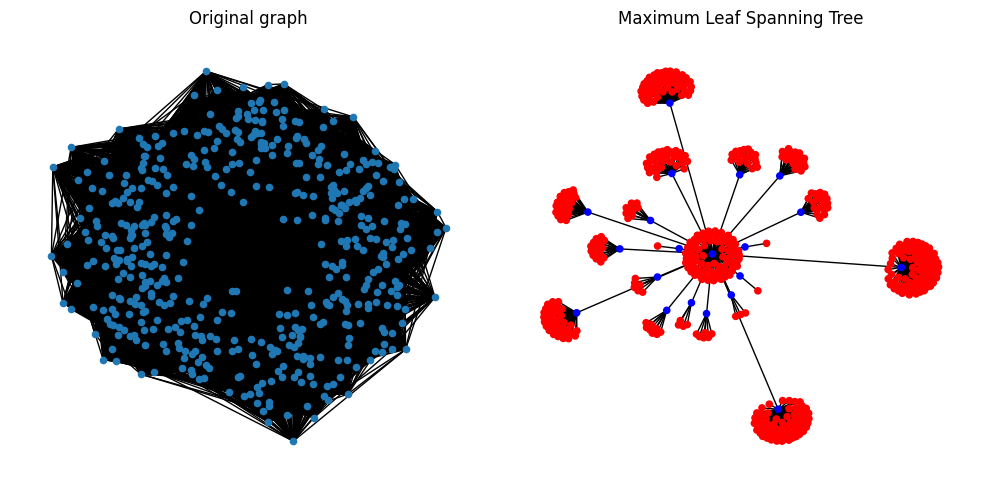

In [43]:
test_graph(num_of_nodes=500,
               edge_existence_prob = 0.2,
               num_iters=10,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=100,
               tournament_size=20)



Testing a graph of 500 nodes and 62528 edges...

Execution time: 			 1m 25s 51ms
Number of leaves of a random MST: 	 490
Number of leaves of MLST: 		 490


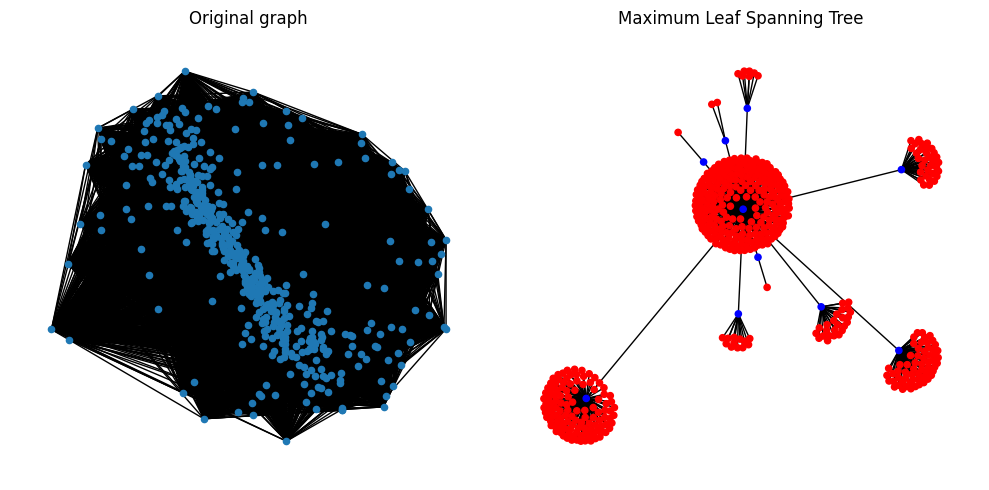

In [44]:
test_graph(num_of_nodes=500,
               edge_existence_prob = 0.5,
               num_iters=10,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=100,
               tournament_size=20)



Testing a graph of 500 nodes and 87169 edges...

Execution time: 			 1m 53s 681ms
Number of leaves of a random MST: 	 493
Number of leaves of MLST: 		 495


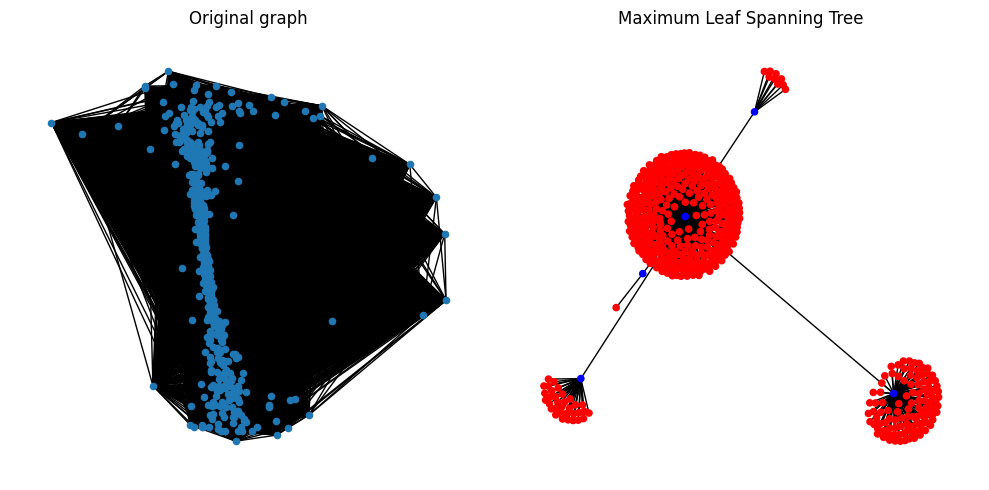

In [45]:
test_graph(num_of_nodes=500,
               edge_existence_prob = 0.7,
               num_iters=10,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=100,
               tournament_size=20)